<br>
<img src="logoMoSEF.jpeg" width=90px align="left">
<div align="right">Enseignant : Rania Kaffel</div>
<div align="right">Réalisé par : Gaoussou DIAKITE et Eunice KOFFI</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 Modélistaion Statistiques Economiques et Financières</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet Finance Quantitative</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Partie B : Clustering</span></div><br>
<hr>

# Importation des modules et packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage 
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

# Préparation des données

## Importation des données

Dans cette partie, nous travaillons avec les feuilles suivantes du classeur : ROIC, Returns

In [2]:
# Importation des bases de données
Returns = pd.read_excel(r'dta/Data projet.xlsx', sheet_name='Returns')
ROIC  = pd.read_excel(r'data/Data projet.xlsx', sheet_name='ROIC')
liste = pd.read_excel(r'data/Data projet.xlsx', sheet_name='List', header=4, usecols='C:G')
liste.rename(columns={'Unnamed: 2': 'Stocks'}, inplace=True)

print("La base de données Returns contient", Returns.shape[0], "lignes et ", Returns.shape[1], "colonnes.")
print("La base de données ROIC contient", ROIC.shape[0], "lignes et ", ROIC.shape[1], "colonnes.")

La base de données Returns contient 59 lignes et  61 colonnes.
La base de données ROIC contient 48 lignes et  55 colonnes.


## Nettoyage des données

**Base Returns**

In [3]:
Returns.head()

,Stocks,31/10/2017,30/11/2017,31/12/2017,31/01/2018,28/02/2018,31/03/2018,30/04/2018,31/05/2018,30/06/2018,...,31/12/2021,31/01/2022,28/02/2022,31/03/2022,30/04/2022,31/05/2022,30/06/2022,31/07/2022,31/08/2022,30/09/2022
0,BP/ LN Equity,5.919372,-0.988737,6.988426,0.546154,-6.449286,2.560396,10.240530,4.804592,-0.400296,...,3.626525,14.985880,-4.400586,1.302829,-0.138040,12.521070,-13.72032,2.945457,6.652520,-6.079655
1,STERV FH Equity,10.909070,-2.246577,3.931891,7.955951,3.713166,5.921066,8.415009,2.725725,-4.206706,...,7.817748,10.086500,-4.304833,5.968121,0.961133,-3.003349,-18.85769,-2.110731,-2.613566,-14.310720
2,IP US Equity,0.791975,-0.288225,2.349408,8.491543,-4.425673,-10.337310,-3.499906,4.665303,-2.654206,...,3.207381,2.703278,-8.877665,6.018837,0.281690,5.683481,-13.66357,2.247191,-1.677647,-23.834690
3,UPM FH Equity,11.038760,0.068212,3.580244,8.171395,2.290289,7.340285,0.958194,2.068292,-2.465006,...,4.436296,-4.730337,-3.697308,-1.303543,6.038125,1.580805,-14.10452,3.575494,8.173311,-6.389768
4,NEM US Equity,-3.599040,2.295354,1.644609,7.969083,-5.702296,2.657297,0.563092,-0.916264,-2.783047,...,14.029920,-1.370526,8.222985,20.883980,-8.307112,-6.863418,-11.33698,-24.115970,-8.657244,2.939662


In [4]:
def display_missing_values(df):
    count_missing_val = {}
    for c in df.columns:
        nb_miss = ((df[c].isna()) | (df[c].astype(str).str.strip()==""))*1
        nb_miss = nb_miss.sum()
        count_missing_val.update({c:[nb_miss,nb_miss/df.shape[0]]})
    
    res = pd.DataFrame(count_missing_val).T
    res = res.reset_index()
    res.columns = ['variable','nb_missing','pct_missing']
    
    display(res.sort_values('nb_missing',ascending=False))

In [5]:
display_missing_values(Returns)

,variable,nb_missing,pct_missing
1,31/10/2017,4.0,0.067797
2,30/11/2017,4.0,0.067797
3,31/12/2017,4.0,0.067797
10,31/07/2018,2.0,0.033898
17,28/02/2019,2.0,0.033898
...,...,...,...
34,31/07/2020,0.0,0.000000
35,31/08/2020,0.0,0.000000
36,30/09/2020,0.0,0.000000
37,31/10/2020,0.0,0.000000


In [6]:
# Imputation par la médiane
Returns = Returns.fillna(Returns.median())

C:\Users\ekeun\AppData\Local\Temp\ipykernel_7196\727191938.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Returns = Returns.fillna(Returns.median())


In [7]:
Returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Stocks      59 non-null     object 
 1   31/10/2017  59 non-null     float64
 2   30/11/2017  59 non-null     float64
 3   31/12/2017  59 non-null     float64
 4   31/01/2018  59 non-null     float64
 5   28/02/2018  59 non-null     float64
 6   31/03/2018  59 non-null     float64
 7   30/04/2018  59 non-null     float64
 8   31/05/2018  59 non-null     float64
 9   30/06/2018  59 non-null     float64
 10  31/07/2018  59 non-null     float64
 11  31/08/2018  59 non-null     float64
 12  30/09/2018  59 non-null     float64
 13  31/10/2018  59 non-null     float64
 14  30/11/2018  59 non-null     float64
 15  31/12/2018  59 non-null     float64
 16  31/01/2019  59 non-null     float64
 17  28/02/2019  59 non-null     float64
 18  31/03/2019  59 non-null     float64
 19  30/04/2019  59 non-null     flo

In [8]:
stocks_return=Returns['Stocks'].unique().tolist()

In [9]:
# Supression de l'indice de référence
Returns = Returns[Returns['Stocks'] != 'S5ENRS Index']

In [10]:
Returns = Returns.set_index('Stocks')

In [11]:
Returns.head()

,31/10/2017,30/11/2017,31/12/2017,31/01/2018,28/02/2018,31/03/2018,30/04/2018,31/05/2018,30/06/2018,31/07/2018,...,31/12/2021,31/01/2022,28/02/2022,31/03/2022,30/04/2022,31/05/2022,30/06/2022,31/07/2022,31/08/2022,30/09/2022
Stocks,,,,,,,,,,,,,,,,,,,,,
BP/ LN Equity,5.919372,-0.988737,6.988426,0.546154,-6.449286,2.560396,10.240530,4.804592,-0.400296,-1.368019,...,3.626525,14.985880,-4.400586,1.302829,-0.138040,12.521070,-13.72032,2.945457,6.652520,-6.079655
STERV FH Equity,10.909070,-2.246577,3.931891,7.955951,3.713166,5.921066,8.415009,2.725725,-4.206706,-15.460060,...,7.817748,10.086500,-4.304833,5.968121,0.961133,-3.003349,-18.85769,-2.110731,-2.613566,-14.310720
IP US Equity,0.791975,-0.288225,2.349408,8.491543,-4.425673,-10.337310,-3.499906,4.665303,-2.654206,3.168203,...,3.207381,2.703278,-8.877665,6.018837,0.281690,5.683481,-13.66357,2.247191,-1.677647,-23.834690
UPM FH Equity,11.038760,0.068212,3.580244,8.171395,2.290289,7.340285,0.958194,2.068292,-2.465006,-0.611367,...,4.436296,-4.730337,-3.697308,-1.303543,6.038125,1.580805,-14.10452,3.575494,8.173311,-6.389768
NEM US Equity,-3.599040,2.295354,1.644609,7.969083,-5.702296,2.657297,0.563092,-0.916264,-2.783047,-2.731371,...,14.029920,-1.370526,8.222985,20.883980,-8.307112,-6.863418,-11.33698,-24.115970,-8.657244,2.939662


In [12]:
Returns.shape

(58, 60)

**Base ROIC**

Il faut faire une transposition de la base ROIC pour avoir les titres en lignes et les dates en colonnes. 

In [13]:
# Visualisation de la table
ROIC.head()

,Dates,BP/ LN Equity,STERV FH Equity,IP US Equity,UPM FH Equity,NEM US Equity,XOM US Equity,VLO US Equity,NUE US Equity,ABX CT Equity,...,HES US Equity,MRO US Equity,WMB US Equity,CTRA US Equity,APA US Equity,EOG US Equity,KMI US Equity,EQT US Equity,HAL US Equity,FANG US Equity
0,2010-09-30,-5.0064,5.1078,4.8096,5.4457,16.7487,15.0977,3.6338,3.9898,11.4915,...,9.1468,4.7350,-1.3926,4.9106,12.5279,4.4920,1.8561,6.4010,12.0961,NaN
1,2010-12-31,-3.8612,7.6947,7.3868,5.8743,17.0815,16.4121,4.2907,3.0678,13.7229,...,7.2913,5.7988,-1.4019,5.6469,11.0542,1.3706,1.8561,6.5444,14.8516,NaN
2,2011-03-31,-3.3960,8.3741,10.4960,6.5796,16.0324,17.8940,5.7141,4.2683,13.5164,...,7.7950,5.9399,-1.1498,5.0412,12.9984,1.8131,1.8561,6.7159,16.2765,NaN
3,2011-06-30,11.2155,8.3722,10.9066,6.5403,16.1902,17.0817,6.4849,6.1142,12.3045,...,8.5813,6.6759,-0.9703,6.1173,13.8323,3.2879,1.8561,7.4104,17.3168,NaN
4,2011-09-30,12.8167,7.0572,11.2495,3.7876,15.5645,17.9358,10.0138,7.2751,13.0760,...,8.1487,6.3071,7.9785,6.4294,13.1038,7.1415,1.0292,9.9345,18.9449,NaN


In [14]:
ROIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Dates             48 non-null     datetime64[ns]
 1   BP/ LN Equity     48 non-null     float64       
 2   STERV FH Equity   48 non-null     float64       
 3   IP US Equity      48 non-null     float64       
 4   UPM FH Equity     48 non-null     float64       
 5   NEM US Equity     48 non-null     float64       
 6   XOM US Equity     48 non-null     float64       
 7   VLO US Equity     48 non-null     float64       
 8   NUE US Equity     48 non-null     float64       
 9   ABX CT Equity     48 non-null     float64       
 10  FMC US Equity     48 non-null     float64       
 11  FCX US Equity     48 non-null     float64       
 12  TTE FP Equity     48 non-null     float64       
 13  COP US Equity     48 non-null     float64       
 14  ADM US Equity     46 non-nul

In [15]:
display_missing_values(ROIC)

,variable,nb_missing,pct_missing
35,DOW US Equity,37.0,0.770833
36,CTVA US Equity,36.0,0.750000
21,GLEN LN Equity,33.0,0.687500
34,NTR US Equity,30.0,0.625000
33,NTR CT Equity,30.0,0.625000
43,BKR US Equity,25.0,0.520833
27,VNOM UW Equity,17.0,0.354167
24,PSX US Equity,9.0,0.187500
54,FANG US Equity,8.0,0.166667
15,PKX US Equity,5.0,0.104167


In [16]:
# Supression des titres à plus de 50 % de valeurs manquantes
stocks_to_del = ROIC[ROIC.columns[ROIC.isna().sum()/ROIC.shape[0] >=0.5]].columns
print(f'Les titres à supprimer, au nombre de {len(stocks_to_del)}, sont : {stocks_to_del}')
ROIC.drop(stocks_to_del, axis=1, inplace=True)
print(f"La base de données ROIC contient maintenant {ROIC.shape[1] - 1} titres.")

Les titres à supprimer, au nombre de 6, sont : Index(['GLEN LN Equity', 'NTR CT Equity', 'NTR US Equity', 'DOW US Equity',
       'CTVA US Equity', 'BKR US Equity'],
      dtype='object')
La base de données ROIC contient maintenant 48 titres.


In [17]:
# Imputation des valeurs manquantes par la médiane
ROIC = ROIC.fillna(ROIC.median())

C:\Users\ekeun\AppData\Local\Temp\ipykernel_7196\4292212210.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ROIC = ROIC.fillna(ROIC.median())


In [18]:
# Définition de l'index 
ROIC = ROIC.set_index('Dates')

In [19]:
stocks_ROIC=ROIC.columns.tolist()

In [20]:
# Transposition de la table
ROIC_tr = ROIC.transpose()

In [21]:
ROIC_tr.head()

Dates,2010-09-30,2010-12-31,2011-03-31,2011-06-30,2011-09-30,2011-12-31,2012-03-31,2012-06-30,2012-09-30,2012-12-31,...,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30
BP/ LN Equity,-5.0064,-3.8612,-3.3960,11.2155,12.8167,13.7231,12.0522,8.3804,8.2218,4.8861,...,-1.4280,-11.6114,-12.7558,-11.5313,-7.2600,4.2100,3.9532,4.4600,-11.3004,-7.2426
STERV FH Equity,5.1078,7.6947,8.3741,8.3722,7.0572,4.9549,3.9227,3.6250,3.7966,5.4055,...,6.5211,7.0847,7.2149,5.3349,5.2620,5.7433,7.4469,8.7195,9.4419,9.3697
IP US Equity,4.8096,7.3868,10.4960,10.9066,11.2495,10.2002,9.3368,8.7097,7.7276,7.5861,...,5.1191,4.9250,4.1272,3.2337,5.3017,5.1771,8.1864,9.4555,10.0533,11.3943
UPM FH Equity,5.4457,5.8743,6.5796,6.5403,3.7876,3.4755,2.8927,2.1780,3.1778,-10.0178,...,8.6712,7.6085,5.9954,5.0002,5.3392,6.5083,9.7374,10.2615,9.3597,8.8481
NEM US Equity,16.7487,17.0815,16.0324,16.1902,15.5645,6.1936,6.0840,5.1508,3.8440,10.5168,...,8.2051,7.4406,8.1303,9.1086,7.7524,8.8009,5.8004,1.0831,0.8725,0.4019


## Synthèse des traitements

* **La base Returns**

La base de données Returns contient la rentabilité mensuelle des titres du 31 octobre 2019 au 30 septembre 2022.
Nous avons en lignes les titres et en colonnes les dates.
Après avoir imputé les valeurs manquantes par la médiane, nous supprimons de la base la ligne correspondant aux informations relatives à l'indice de référence.
Elle contient finalement 58 titres et 60 colonnes.

* **La base ROIC**

La base ROIC contient la rentabilité trimestrielle de septembre 2010 à juin 2022. Nous avons en lignes les dates et en colonnes les titres.
Pour commencer, nous supprimons les titres pour lesquels plus de 50% d'informations sont manquantes. Puis, nous imputons les autres valeurs par la médiane. La configuration de la table, ne nous permettant pas de réaliser notre analyse simplement, nous allons la transposer. Nous obtenons au final, une base de données avec 48 titres et 48 colonnes.

# Clustering

##  CAH basé sur les ROIC

In [22]:
# Scaler les données
sc = StandardScaler()
X = sc.fit_transform(ROIC_tr)
X.shape

(48, 48)

In [23]:
Z = linkage(X, method = "ward", metric = "euclidean")

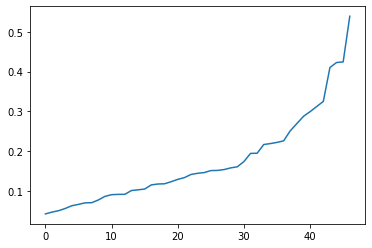

In [24]:
# Perte d'inertie
A = Z[ : ,3] =(1/ROIC_tr.shape[0])*Z[ : ,2]
plt.plot(A)

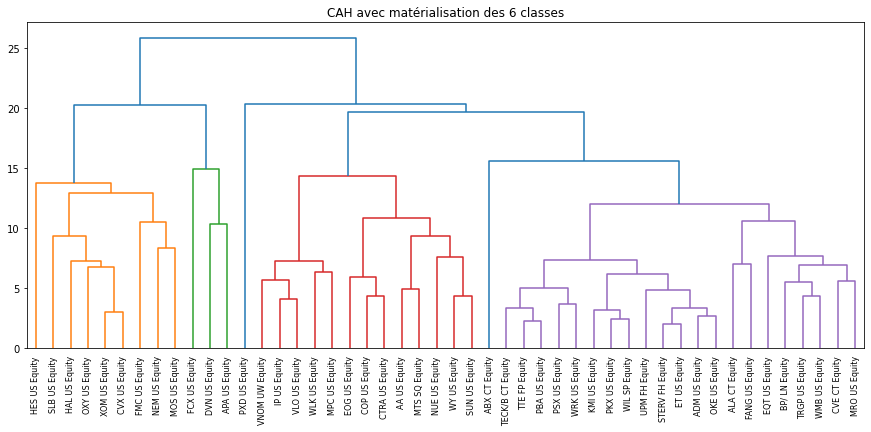

In [25]:
fig = plt.figure(figsize=(15, 6))
plt.title("CAH avec matérialisation des 6 classes")
dn = dendrogram(Z, labels = ROIC_tr.index, color_threshold = 15)

In [26]:
groupes_cah = fcluster(Z, t = 15, criterion = "distance")
groupes_cah

array([4, 4, 3, 4, 1, 1, 3, 3, 5, 1, 2, 4, 3, 4, 4, 4, 4, 4, 4, 3, 1, 3,
       4, 3, 4, 3, 3, 4, 4, 3, 3, 1, 4, 1, 6, 4, 1, 2, 1, 4, 4, 3, 2, 3,
       4, 4, 1, 4], dtype=int32)

In [27]:
for cluster in range(6):
    print(f"Le nombre d'observation du cluster {cluster+1} est : {sum(groupes_cah==cluster+1)}")

Le nombre d'observation du cluster 1 est : 9
Le nombre d'observation du cluster 2 est : 3
Le nombre d'observation du cluster 3 est : 13
Le nombre d'observation du cluster 4 est : 21
Le nombre d'observation du cluster 5 est : 1
Le nombre d'observation du cluster 6 est : 1


In [28]:
id_clusters = np.argsort(groupes_cah)
df_clusters = pd.DataFrame({"Stocks":ROIC_tr.index[id_clusters],
                            "cluster":groupes_cah[id_clusters]
                           })
df_clusters.head()

,Stocks,cluster
0,HES US Equity,1
1,OXY US Equity,1
2,SLB US Equity,1
3,NEM US Equity,1
4,XOM US Equity,1


In [29]:
# Les différents titres dans les mêmes clusters
for i in range(1,7):
    print("les titres qui composent le cluster", i," sont:", ', '.join(df_clusters[df_clusters['cluster']==i]['Stocks'].unique().tolist()), "\n")

les titres qui composent le cluster 1  sont: HES US Equity, OXY US Equity, SLB US Equity, NEM US Equity, XOM US Equity, CVX US Equity, HAL US Equity, FMC US Equity, MOS US Equity 

les titres qui composent le cluster 2  sont: DVN US Equity, FCX US Equity, APA US Equity 

les titres qui composent le cluster 3  sont: WLK US Equity, WY US Equity, SUN US Equity, VNOM UW Equity, MPC US Equity, MTS SQ Equity, CTRA US Equity, COP US Equity, EOG US Equity, NUE US Equity, VLO US Equity, IP US Equity, AA US Equity 

les titres qui composent le cluster 4  sont: WMB US Equity, TRGP US Equity, KMI US Equity, OKE US Equity, EQT US Equity, MRO US Equity, BP/ LN Equity, WRK US Equity, ET US Equity, PSX US Equity, ALA CT Equity, CVE CT Equity, WIL SP Equity, TECK/B CT Equity, PKX US Equity, ADM US Equity, TTE FP Equity, UPM FH Equity, STERV FH Equity, PBA US Equity, FANG US Equity 

les titres qui composent le cluster 5  sont: ABX CT Equity 

les titres qui composent le cluster 6  sont: PXD US Equity 


### Caractérisation de la partition et de ses classes

In [30]:
ROIC_tr['Stocks'] = ROIC_tr.index

In [31]:
ROIC_tr = ROIC_tr.merge(df_clusters, on='Stocks', how='left')

In [32]:
ROIC_tr['cluster'] = ROIC_tr['cluster'].astype(str)

In [33]:
table_moyenne = ROIC_tr.groupby('cluster').mean()
table_moyenne

,2010-09-30,2010-12-31,2011-03-31,2011-06-30,2011-09-30,2011-12-31,2012-03-31,2012-06-30,2012-09-30,2012-12-31,...,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30
cluster,,,,,,,,,,,,,,,,,,,,,
1,13.151878,13.349022,14.162089,15.023711,15.553956,15.571556,14.979356,14.230289,13.446700,13.593122,...,-5.769967,-9.374522,-6.735333,-6.508067,-1.601944,3.104167,5.459600,9.172889,10.654600,12.561267
2,17.790867,17.782533,17.693700,19.697833,18.901600,16.052833,14.499133,12.352767,9.210100,7.544600,...,-26.684600,-28.002467,-27.054733,-19.521800,1.981033,8.052033,12.051600,19.252833,26.486900,32.735067
3,6.063215,6.712369,7.734262,8.262592,9.335969,8.311277,8.278485,8.102385,7.458008,7.714592,...,2.676100,1.311285,-0.023985,0.504631,5.548062,9.064785,13.146208,15.830546,18.961162,22.585208
4,6.125267,6.192629,6.089338,6.107919,6.713052,7.090433,6.754890,6.049671,5.729919,4.797943,...,0.363786,-1.574052,-2.785852,-2.069995,1.522610,3.033819,4.070386,6.009881,4.664569,6.865731
5,11.491500,13.722900,13.516400,12.304500,13.076000,12.186800,11.887800,9.820600,8.084500,-0.462500,...,16.562200,17.593200,11.680800,11.680800,11.680800,11.680800,11.680800,11.680800,7.584700,7.675300
6,3.756800,5.051400,5.215000,5.883200,7.013600,5.118500,5.779600,2.551000,-1710.726900,-1844.800100,...,5.915000,3.938100,1.622100,-0.274600,-2.814500,1.477200,6.452400,9.122900,15.597000,20.943800


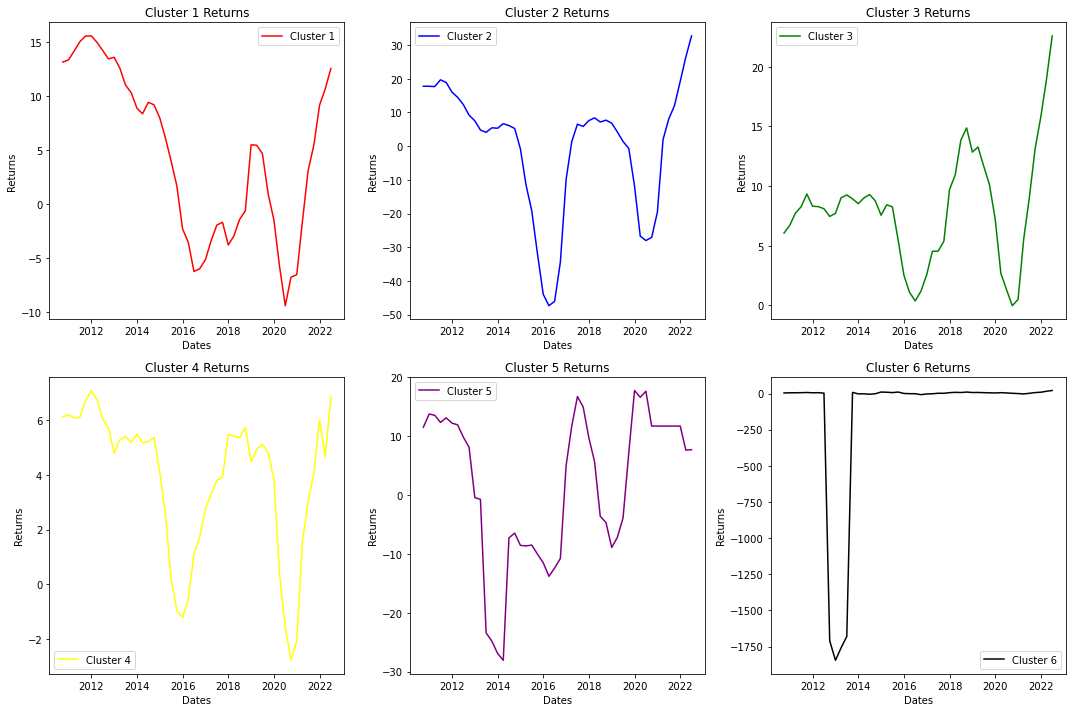

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

dates = table_moyenne.columns
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black']
for i in range(1,7):
    cluster = []
    for c in table_moyenne.columns:
        cluster.append(table_moyenne[table_moyenne.index==str(i)][c].tolist()[0])
    axs[i-1].plot(dates, cluster, color=colors[i-1], label=f'Cluster {i}')
    axs[i-1].set_xlabel('Dates')
    axs[i-1].set_ylabel('Returns')
    axs[i-1].set_title(f'Cluster {i} Returns')
    axs[i-1].legend()

plt.tight_layout()
plt.show()

Nous avons des similitudes concernant les titres des différents clusters : 
- Les effets de la crise COVID sont visibles sur les courbes. On a un pic à la baisse.

Nous constatons une différence entre les différents clusters à plusieurs niveaux :
- Au niveau de l'amplitude des variations: On remarque que les différents clusters ont des titres qui sont plus ou moins volatiles. 
- Au niveau des échelles : Certains clusters contiennent des titres avec des rentabilités plus hautes que d'autres
- Au niveau des variations : Sur certaines années, les pics sont *"corrélés"* et sur d'autres clusters, on a ces mêmes variations avec un retard

A présent, essayons d'analyser la contribution des variables à la construction de la partition.

Pour vérifier si une variable quantitative influence la partition ou non, on va considérer la classe de chaque individu comme une variable qualitative et tester la liaision entre la variable qualitative la variable quantitive. Cette méthode est connue sous le nom de *ANOVA*, ou *analyse de la variance à 1 facteur*. Il s'agit de vérifier si on peut considérer les moyennes conditionnelles d'une variable sur chaque classe comme égales.

Soit X la variable, $\mu_i$ sa moyenne conditionnelle sur la classe $i$. On teste:

$$H_0=\{ \mu_1=\mu_2=\ldots=\mu_K\}$$ 

$$H_1=\{\text{il existe au moins une des $\mu_i$ qui diffère}\}$$


In [35]:
ROIC = ROIC_tr.drop('Stocks', axis=1).set_index('cluster')
ROIC_ = ROIC_tr.set_index('Stocks').drop('cluster', axis=1)

In [36]:
import statsmodels.formula.api
import statsmodels.api 
for i,j in ROIC.iteritems():
    print(i)
    fit = statsmodels.formula.api.ols('j ~ cluster', data = ROIC).fit()
    table = statsmodels.api.stats.anova_lm(fit)
    print(table)

2010-09-30 00:00:00
            df       sum_sq     mean_sq          F    PR(>F)
cluster    1.0   398.943069  398.943069  18.205601  0.000098
Residual  46.0  1008.007453   21.913206        NaN       NaN
2010-12-31 00:00:00
            df       sum_sq     mean_sq          F    PR(>F)
cluster    1.0   348.753968  348.753968  14.103775  0.000485
Residual  46.0  1137.474358   24.727703        NaN       NaN
2011-03-31 00:00:00
            df       sum_sq     mean_sq          F    PR(>F)
cluster    1.0   336.696196  336.696196  12.159419  0.001086
Residual  46.0  1273.747141   27.690155        NaN       NaN
2011-06-30 00:00:00
            df      sum_sq     mean_sq         F    PR(>F)
cluster    1.0   445.75058  445.750580  13.25961  0.000686
Residual  46.0  1546.38991   33.617172       NaN       NaN
2011-09-30 00:00:00
            df       sum_sq     mean_sq          F    PR(>F)
cluster    1.0   337.344574  337.344574  10.575381  0.002149
Residual  46.0  1467.356119   31.899046        NaN  

Au seuil de 5%, on ne rejette pas l'hypothèse HO pour certains trimestres. On rejette donc qu'il y'a dépendance entre les trimestres et la variable qualitative. Ces trimestres ne caractérisent donc pas la partition. Ces trimestres sont les trimestres de **2012-09-30** à **2022-06-30**.

Les premiers trimestres sont donc les seuls qui contribuent le plus à la construction de la partition.

On essaie de visualiser dans un plan formé par les deux axes principaux d'une ACP, la représentation des clusters.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


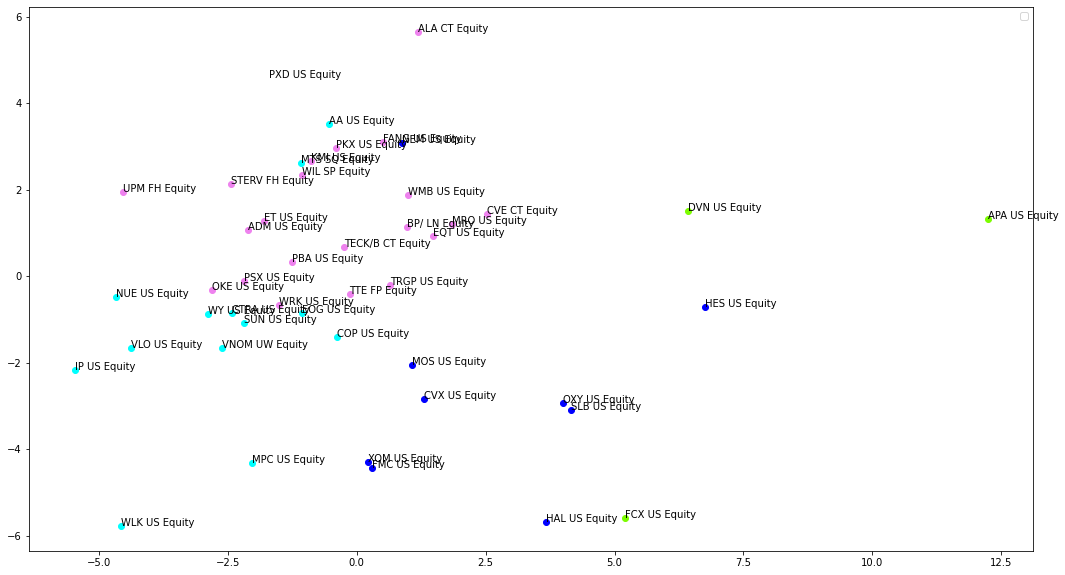

In [37]:
from sklearn.decomposition import PCA
acp = PCA(n_components = 2).fit_transform(X)
#projeter dans le plan factoriel avec un code couleur différent selon le groupe
plt.figure(figsize =(18,10))

for couleur,k in zip(['red', 'blue', 'lawngreen', 'aqua','violet', 'yellow'],[0,1,2,3,4]):
    plt.scatter(acp[groupes_cah==k,0], acp[groupes_cah==k,1],c=couleur)
plt.legend()    
#mettre les labels des points
for i,label in enumerate(ROIC_.index):
    plt.annotate(label,(acp[i,0], acp[i,1]))

Les individus des différents clusters ne sont pas tous bien séparés sur le plan. Cependant, on arrive bien à distinguer les différents clusters.

In [38]:
ROIC = ROIC_tr.set_index('Stocks')

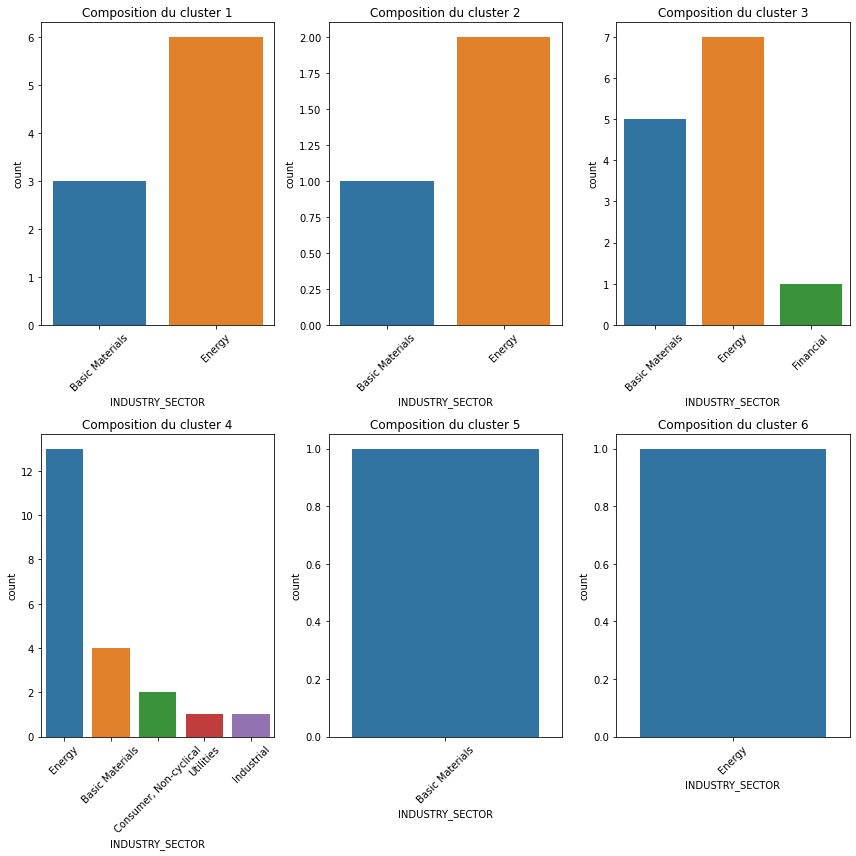

In [39]:
ROIC_cluster_analysis = ROIC.merge(liste, on='Stocks', how='left')
ROIC_cluster_analysis['cluster'] = ROIC_cluster_analysis['cluster'].astype(str)

plt.figure(figsize = (12,12))

for i, group in enumerate(range(1,7)):
    plt.subplot(2, 3, i+1)
    data_group = ROIC_cluster_analysis[ROIC_cluster_analysis['cluster'] == str(group)]
    plt.title(f"Composition du cluster {group}")
    plt.xlabel("Secteur d'activités")
    plt.ylabel("Nombre")
    plt.xticks(rotation = 45)
    labels=data_group['INDUSTRY_SECTOR'].value_counts()
    sns.countplot(x=data_group['INDUSTRY_SECTOR'])

plt.tight_layout()
plt.show()

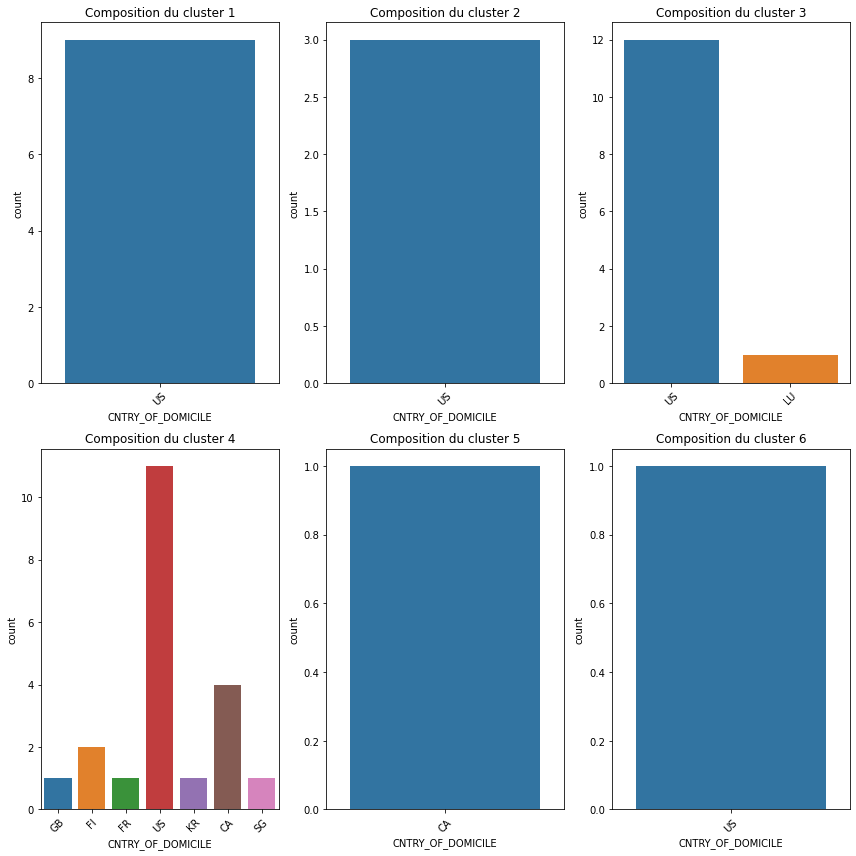

In [40]:
plt.figure(figsize = (12,12))

for i, group in enumerate(range(1,7)):
    plt.subplot(2, 3, i+1)
    data_group = ROIC_cluster_analysis[ROIC_cluster_analysis['cluster'] == str(group)]
    plt.title(f"Composition du cluster {group}")
    plt.xlabel("Secteur d'activités")
    plt.ylabel("Nombre")
    plt.xticks(rotation = 45)
    labels=data_group['CNTRY_OF_DOMICILE'].value_counts()
    sns.countplot(x=data_group['CNTRY_OF_DOMICILE'])

plt.tight_layout()
plt.show()

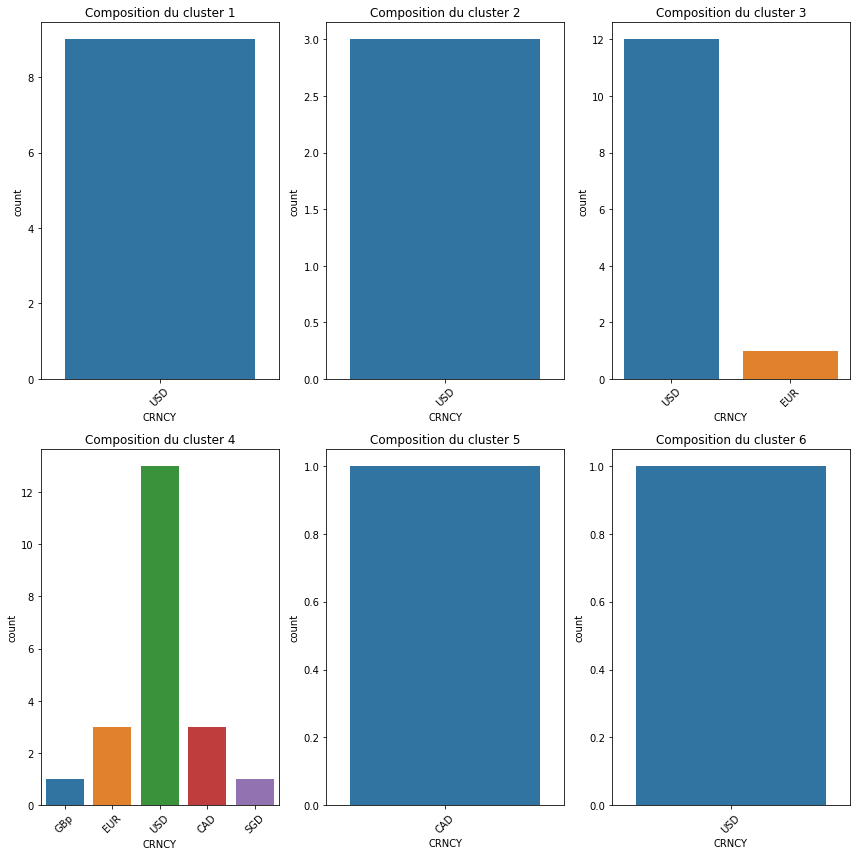

In [41]:
plt.figure(figsize = (12,12))

for i, group in enumerate(range(1,7)):
    plt.subplot(2, 3, i+1)
    data_group = ROIC_cluster_analysis[ROIC_cluster_analysis['cluster'] == str(group)]
    plt.title(f"Composition du cluster {group}")
    plt.xlabel("Secteur d'activités")
    plt.ylabel("Nombre")
    plt.xticks(rotation = 45)
    labels=data_group['CRNCY'].value_counts()
    sns.countplot(x=data_group['CRNCY'])

plt.tight_layout()
plt.show()

Nous pouvons qualifier le cluster 4 de portefeuille diversifié puisqu'il intègre des titres de différents secteurs, domiciliés dans différents pays avec des monnaies différentes.

Le ROIC du cluster 3 est toujours positif sur la période considérée.

##  K-means basée sur les returns

Nous allons reprendre toutes les mêmes analyses faites sur la CAH avec les returns.

In [42]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2)
X = sc.fit_transform(Returns)
kmeans.fit(X)

C:\Users\ekeun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [43]:
groupes_km=kmeans.labels_

In [44]:
kmeans.labels_

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [45]:
for cluster in range(2):
    print(f"Le nombre d'observation du cluster {cluster+1} est : {sum(groupes_km==cluster)}")

Le nombre d'observation du cluster 1 est : 22
Le nombre d'observation du cluster 2 est : 36


In [46]:
# Les différents titres dans les mêmes clusters
for i in range(2):
    print("les titres qui composent le cluster", i+1," sont:", ', '.join(df_clusters[df_clusters['cluster']==i]['Stocks'].unique().tolist()), "\n")

les titres qui composent le cluster 1  sont:  

les titres qui composent le cluster 2  sont: HES US Equity, OXY US Equity, SLB US Equity, NEM US Equity, XOM US Equity, CVX US Equity, HAL US Equity, FMC US Equity, MOS US Equity 



### Caractérisation de la partition et de ses classes

In [47]:
idg = np.argsort(groupes_km)
df_clusters = pd.DataFrame({"Stocks":Returns.index[idg],
                            "cluster":groupes_km[idg]
                           })

In [48]:
Returns['groupes']=groupes_km

In [49]:
import statsmodels.formula.api
import statsmodels.api 
for i,j in Returns.iteritems():
    print(i)
    fit = statsmodels.formula.api.ols('j ~ groupes', data = Returns).fit()
    table = statsmodels.api.stats.anova_lm(fit)
    print(table)

31/10/2017
            df       sum_sq    mean_sq         F    PR(>F)
groupes    1.0    52.546779  52.546779  1.681987  0.199979
Residual  56.0  1749.489683  31.240887       NaN       NaN
30/11/2017
            df       sum_sq    mean_sq         F    PR(>F)
groupes    1.0    27.596543  27.596543  1.119177  0.294638
Residual  56.0  1380.841947  24.657892       NaN       NaN
31/12/2017
            df       sum_sq    mean_sq         F   PR(>F)
groupes    1.0     6.568819   6.568819  0.128693  0.72114
Residual  56.0  2858.378844  51.042479       NaN      NaN
31/01/2018
            df       sum_sq    mean_sq         F    PR(>F)
groupes    1.0     5.764240   5.764240  0.224193  0.637704
Residual  56.0  1439.822352  25.711113       NaN       NaN
28/02/2018
            df       sum_sq     mean_sq          F    PR(>F)
groupes    1.0   510.278436  510.278436  16.171169  0.000175
Residual  56.0  1767.070345   31.554828        NaN       NaN
31/03/2018
            df       sum_sq     mean_sq       

Au seuil de 5%, on ne rejette pas l'hypothèse HO pour certains mois. On rejette donc qu'il y'a dépendance entre ces rendements mensuels et la variable qualitative. Ces variables ne caractérisent donc pas la partition. 

Les premiers trimestres sont donc les seuls qui contribuent le plus à la construction de la partition.

Tout comme pour la CAH, on essaie de visualiser dans un plan formé par les deux axes principaux d'une ACP, la représentation des clusters.

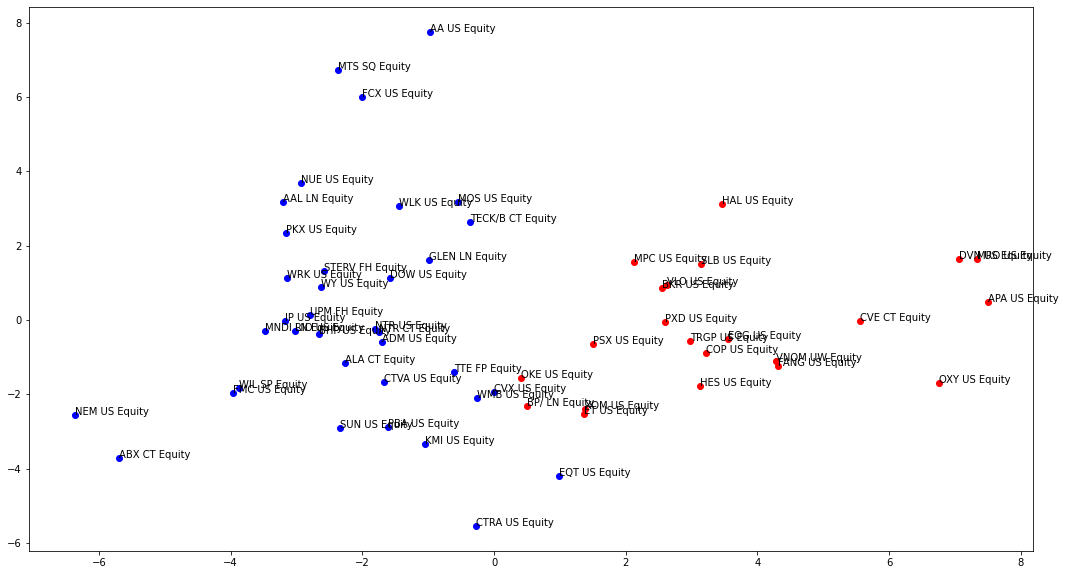

In [50]:
from sklearn.decomposition import PCA
acp = PCA(n_components = 2).fit_transform(X)
#projeter dans le plan factoriel avec un code couleur différent selon le groupe
plt.figure(figsize =(18,10))
for couleur,k in zip(['red', 'blue', 'lawngreen', 'aqua','violet'],[0,1,2,3,4]):
    plt.scatter(acp[groupes_km==k,0], acp[groupes_km==k,1],c=couleur)
    
#mettre les labels des points
for i,label in enumerate(Returns.index):
    plt.annotate(label,(acp[i,0], acp[i,1]))

Contrairement à l'analyse faite avec la CAH, on voit bien la répartition des deux groupes sur le graphique.

In [51]:
Returns = Returns.merge(df_clusters, on='Stocks', how='left')
Returns['cluster'] = Returns['cluster'].astype(str)

In [52]:
G=Returns.groupby('cluster').mean().drop('groupes', axis=1)
G

,31/10/2017,30/11/2017,31/12/2017,31/01/2018,28/02/2018,31/03/2018,30/04/2018,31/05/2018,30/06/2018,31/07/2018,...,31/12/2021,31/01/2022,28/02/2022,31/03/2022,30/04/2022,31/05/2022,30/06/2022,31/07/2022,31/08/2022,30/09/2022
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.624684,2.122832,7.115326,4.723559,-11.583361,4.794080,12.247516,4.836919,0.501790,2.090799,...,3.057155,19.851941,7.734978,9.31080,-2.075214,17.177679,-18.914632,6.896783,4.981447,-10.267922
1,1.336979,0.701228,6.421748,4.073845,-5.470353,-2.448815,3.293844,2.652730,-0.586712,0.150554,...,8.066655,2.307713,8.593590,10.43069,-2.345572,2.971734,-17.616058,5.482325,-0.246202,-10.413512


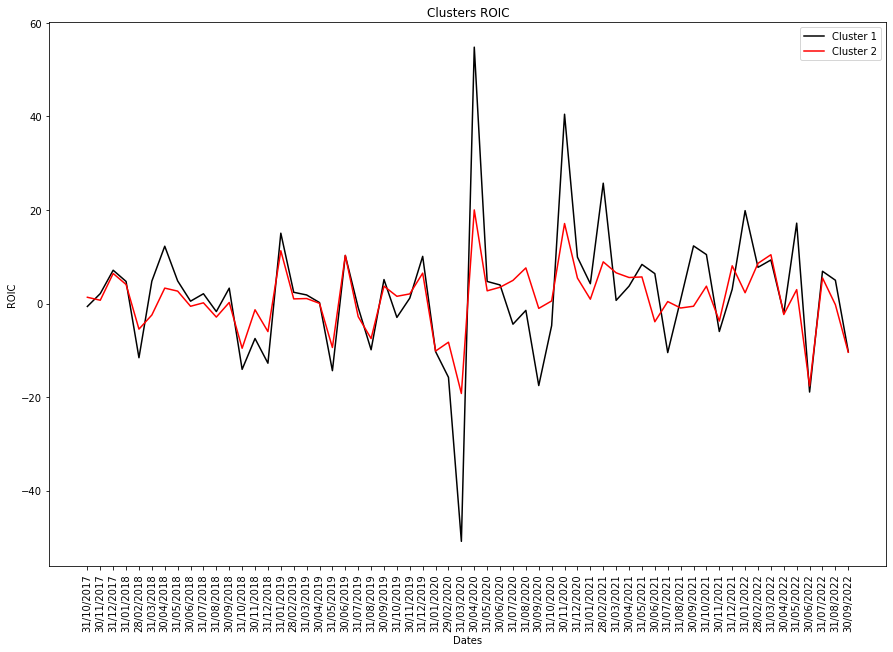

In [53]:
dates = G.columns
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black']
plt.figure(figsize =(15,10))
for i in range(2):
    cluster = []
    for c in G.columns:
        cluster.append(G[G.index==str(i)][c].tolist())
    plt.plot(dates, cluster, color=colors[i-1], label=f'Cluster {i+1}')
    plt.xlabel('Dates')
    plt.xticks(rotation = 90)
    plt.ylabel('ROIC')
    plt.title(f'Clusters ROIC')
    plt.legend()

plt.show()

Nous constatons sur ce graphique que les titres du cluster 2 sont plus volatiles que les titres du cluster 1. Cependant les deux ROIC sont en moyenne nuls.

In [54]:
Returns_cluster_analysis = Returns.merge(liste, on='Stocks', how='left')
Returns_cluster_analysis['cluster'] = Returns_cluster_analysis['cluster'].astype(str)

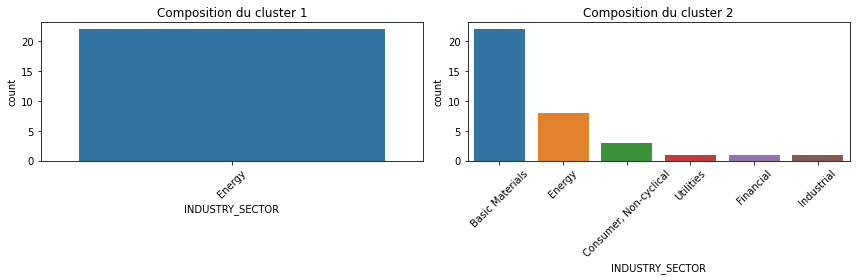

In [55]:
plt.figure(figsize = (12,4))

for i, group in enumerate(range(2)):
    plt.subplot(1, 2, i+1)
    data_group = Returns_cluster_analysis[Returns_cluster_analysis['cluster'] == str(group)]
    plt.title(f"Composition du cluster {group+1}")
    plt.xlabel("Secteur d'activités")
    plt.ylabel("Nombre")
    plt.xticks(rotation = 45)
    labels=data_group['INDUSTRY_SECTOR'].value_counts()
    sns.countplot(x=data_group['INDUSTRY_SECTOR'])

plt.tight_layout()
plt.show()

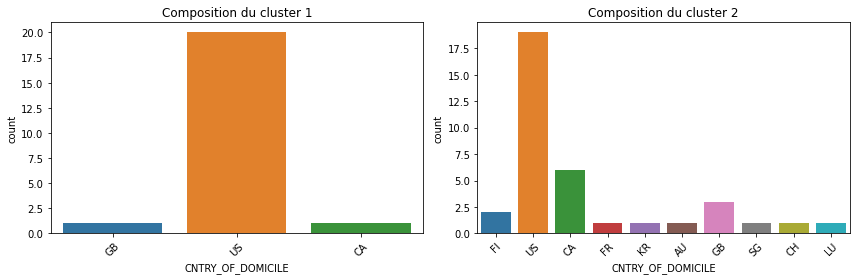

In [56]:
plt.figure(figsize = (12,4))

for i, group in enumerate(range(2)):
    plt.subplot(1, 2, i+1)
    data_group = Returns_cluster_analysis[Returns_cluster_analysis['cluster'] == str(group)]
    plt.title(f"Composition du cluster {group+1}")
    plt.xlabel("Secteur d'activités")
    plt.ylabel("Nombre")
    plt.xticks(rotation = 45)
    labels=data_group['CNTRY_OF_DOMICILE'].value_counts()
    sns.countplot(x=data_group['CNTRY_OF_DOMICILE'])

plt.tight_layout()
plt.show()

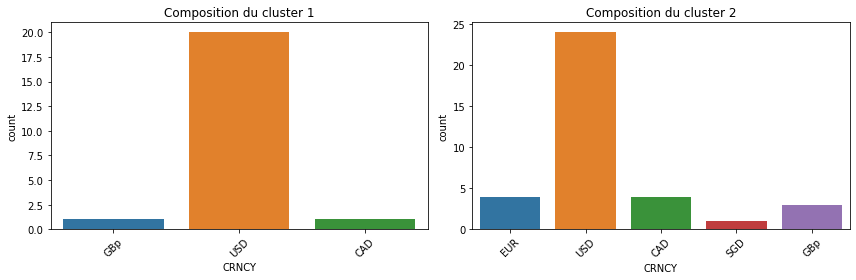

In [57]:
plt.figure(figsize = (12,4))

for i, group in enumerate(range(2)):
    plt.subplot(1, 2, i+1)
    data_group = Returns_cluster_analysis[Returns_cluster_analysis['cluster'] == str(group)]
    plt.title(f"Composition du cluster {group+1}")
    plt.xlabel("Secteur d'activités")
    plt.ylabel("Nombre")
    plt.xticks(rotation = 45)
    labels=data_group['CRNCY'].value_counts()
    sns.countplot(x=data_group['CRNCY'])

plt.tight_layout()
plt.show()

Le cluster 1 est un portefeuille constitué de titres du secteur de l'énergie uniquement. C'est le portefeuille le plus volatile. Il a connu de fortes pertubations lors de la crise covid. Dans tous les portefeuilles construits avec la CAH ou le K-means, les résultats nous montrent l'instabilité des titres de l'énergie et la sensibilité de ceux-ci facd à un choc. 
Par ailleurs, un portefeuille diversifié permet de diversifier de répartir les risques sur tous les titres.